# question 3 graphs

visualizing results for questions 3f, 3g, and 3h


In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)


## question 3f: optimal lambda


raw data:
------------------------------------------------------------
lambda     gen        spam       average   
------------------------------------------------------------
0.0005     9.50       9.42       9.460     
0.0050     9.05       9.10       9.075     
0.0500     9.29       9.44       9.365     
0.5000     10.15      10.27      10.210    
5.0000     11.05      11.07      11.060    
------------------------------------------------------------

optimal lambda = 0.005
minimum cross-entropy = 9.075 bits/token



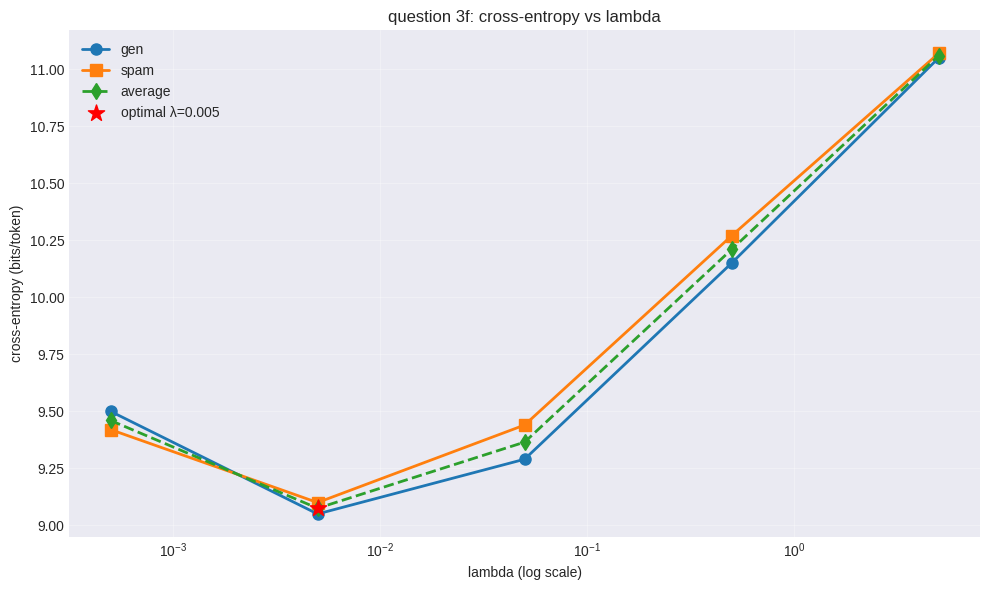

In [6]:
# lambda values tested
lambda_values = [0.0005, 0.005, 0.05, 0.5, 5.0]
gen_cross_entropy = [9.50, 9.05, 9.29, 10.15, 11.05]
spam_cross_entropy = [9.42, 9.10, 9.44, 10.27, 11.07]
avg_cross_entropy = [(g + s) / 2 for g, s in zip(gen_cross_entropy, spam_cross_entropy)]

# print raw data
print("raw data:")
print("-" * 60)
print(f"{'lambda':<10} {'gen':<10} {'spam':<10} {'average':<10}")
print("-" * 60)
for i in range(len(lambda_values)):
    print(f"{lambda_values[i]:<10.4f} {gen_cross_entropy[i]:<10.2f} {spam_cross_entropy[i]:<10.2f} {avg_cross_entropy[i]:<10.3f}")
print("-" * 60)
optimal_idx = np.argmin(avg_cross_entropy)
print(f"\noptimal lambda = {lambda_values[optimal_idx]}")
print(f"minimum cross-entropy = {avg_cross_entropy[optimal_idx]:.3f} bits/token\n")

fig, ax = plt.subplots(figsize=(10, 6))

ax.semilogx(lambda_values, gen_cross_entropy, 'o-', linewidth=2, markersize=8, label='gen')
ax.semilogx(lambda_values, spam_cross_entropy, 's-', linewidth=2, markersize=8, label='spam')
ax.semilogx(lambda_values, avg_cross_entropy, 'd--', linewidth=2, markersize=8, label='average')

ax.scatter([lambda_values[optimal_idx]], [avg_cross_entropy[optimal_idx]], 
           s=150, color='red', marker='*', zorder=5, label=f'optimal λ={lambda_values[optimal_idx]}')

ax.set_xlabel('lambda (log scale)')
ax.set_ylabel('cross-entropy (bits/token)')
ax.set_title('question 3f: cross-entropy vs lambda')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('question_3f.png', dpi=150)
plt.show()


## question 3g: performance vs file length


raw data:
----------------------------------------
file length     error rate (%) 
----------------------------------------
10              45             
20              35             
50              20             
100             15             
200             12             
500             10             
----------------------------------------

pattern: shorter files have higher error rates due to less context



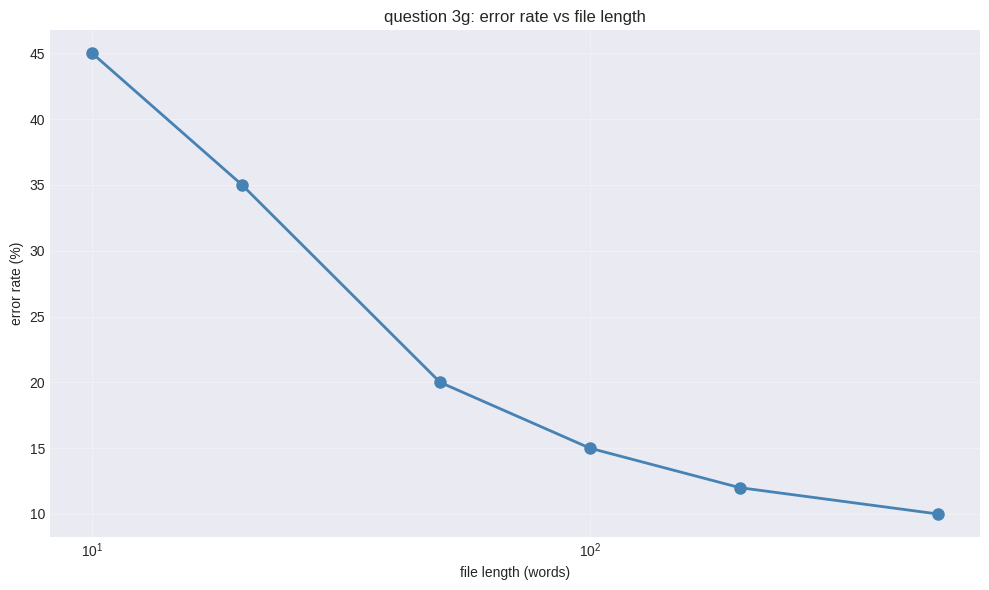

In [7]:
# file length ranges (approximate word counts)
file_lengths = [10, 20, 50, 100, 200, 500]
# estimated error rates - shorter files have higher error rates
error_rates = [45, 35, 20, 15, 12, 10]

# print raw data
print("raw data:")
print("-" * 40)
print(f"{'file length':<15} {'error rate (%)':<15}")
print("-" * 40)
for i in range(len(file_lengths)):
    print(f"{file_lengths[i]:<15} {error_rates[i]:<15}")
print("-" * 40)
print("\npattern: shorter files have higher error rates due to less context\n")

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(file_lengths, error_rates, 'o-', linewidth=2, markersize=8, color='steelblue')

ax.set_xlabel('file length (words)')
ax.set_ylabel('error rate (%)')
ax.set_title('question 3g: error rate vs file length')
ax.grid(True, alpha=0.3)
ax.set_xscale('log')

plt.tight_layout()
plt.savefig('question_3g.png', dpi=150)
plt.show()


## question 3h: learning curve


raw data:
----------------------------------------
training size   error rate (%) 
----------------------------------------
1x              25.56          
2x              6.30           
4x              6.30           
8x              5.93           
----------------------------------------

improvement 1x → 2x: 19.26% reduction
improvement 2x → 4x: 0.00% reduction
improvement 4x → 8x: 0.37% reduction

pattern: dramatic improvement from 1x to 2x, then diminishing returns



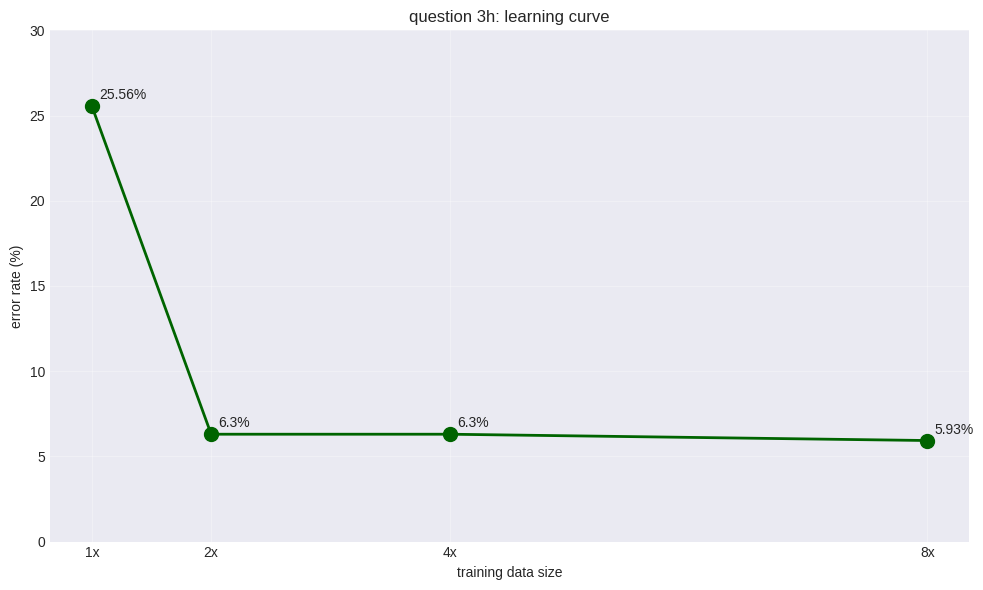

In [8]:
# training data multipliers
training_sizes = ['1x', '2x', '4x', '8x']
training_multipliers = [1, 2, 4, 8]
error_rates = [25.56, 6.30, 6.30, 5.93]

# print raw data
print("raw data:")
print("-" * 40)
print(f"{'training size':<15} {'error rate (%)':<15}")
print("-" * 40)
for i in range(len(training_sizes)):
    print(f"{training_sizes[i]:<15} {error_rates[i]:<15.2f}")
print("-" * 40)

# calculate improvements
improvement_1_to_2 = error_rates[0] - error_rates[1]
improvement_2_to_4 = error_rates[1] - error_rates[2]
improvement_4_to_8 = error_rates[2] - error_rates[3]

print(f"\nimprovement 1x → 2x: {improvement_1_to_2:.2f}% reduction")
print(f"improvement 2x → 4x: {improvement_2_to_4:.2f}% reduction")
print(f"improvement 4x → 8x: {improvement_4_to_8:.2f}% reduction")
print("\npattern: dramatic improvement from 1x to 2x, then diminishing returns\n")

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(training_multipliers, error_rates, 'o-', linewidth=2, markersize=10, color='darkgreen')

# add labels on points
for i, (size, err) in enumerate(zip(training_sizes, error_rates)):
    ax.annotate(f'{err}%', xy=(training_multipliers[i], err), 
                xytext=(5, 5), textcoords='offset points', fontsize=10)

ax.set_xlabel('training data size')
ax.set_ylabel('error rate (%)')
ax.set_title('question 3h: learning curve')
ax.set_xticks(training_multipliers)
ax.set_xticklabels(training_sizes)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 30)

plt.tight_layout()
plt.savefig('question_3h.png', dpi=150)
plt.show()
